# 딥러닝 구조
출처: https://github.com/Harry24k/Pytorch-Basic

## 신경망과 퍼셉트론

퍼셉트론: 다수의 신호를 받아 하나의 신호를 출력
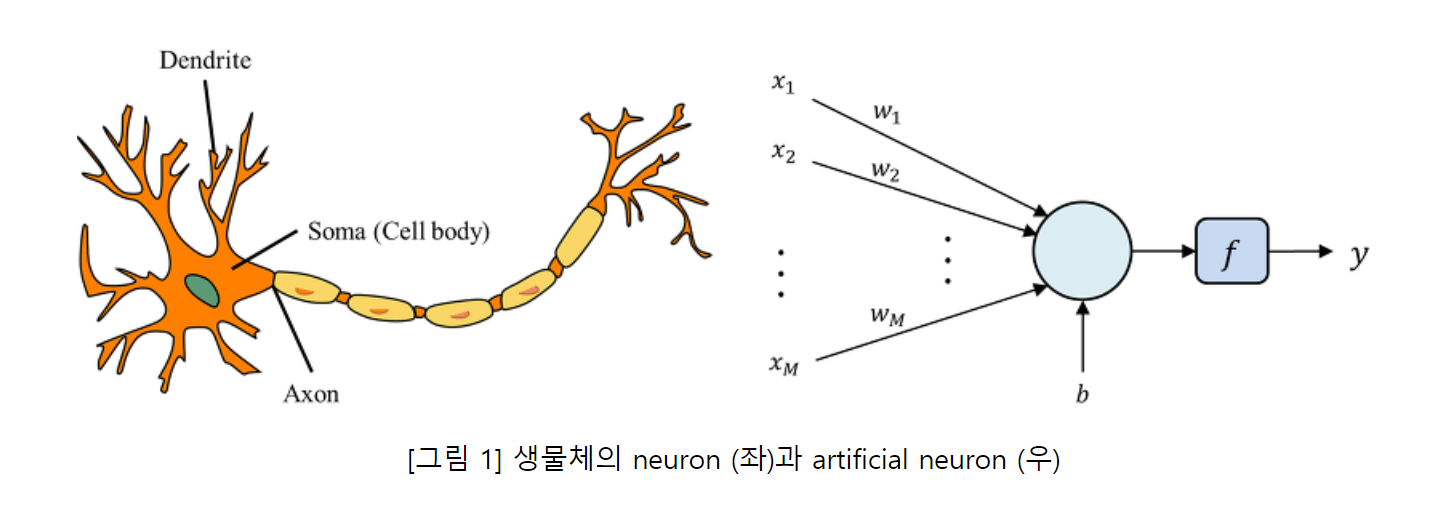
(그림 출처: https://smartstuartkim.wordpress.com/2019/01/27/history-of-neural-networks-1-perceptron/)

목표: 역전파를 활용해 좋은 가중치를 찾아내자!
- 순전파: 데이터를 이용해 손실함수를 계산한다
- 역전파: 기울기를 계산해 개선방향으로 가중치를 개선한다

### Linear regression

loss function 과 back propergation

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_data = torch.Tensor([1, 2, 3, 4, 5])
y_data = torch.Tensor([2, 4, 6, 8, 10])

x = x_data.view(5, 1)
y = y_data.view(5, 1) #reshape

print("x :", x)
print("y :", y)

x : tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
y : tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])


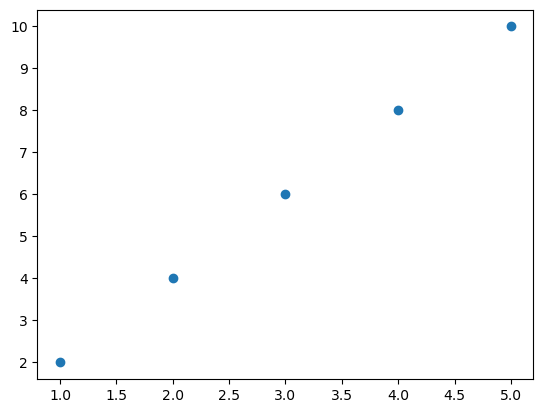

In [4]:
plt.scatter(x.numpy(), y.numpy()) #tensor를 바로 scatter 할 수 없기 때문에 numpy로 바꿔줘야 함.
plt.show()

In [5]:
w = torch.rand(1,1)
w.item()

0.6076266169548035

In [6]:
w*x

tensor([[0.6076],
        [1.2153],
        [1.8229],
        [2.4305],
        [3.0381]])

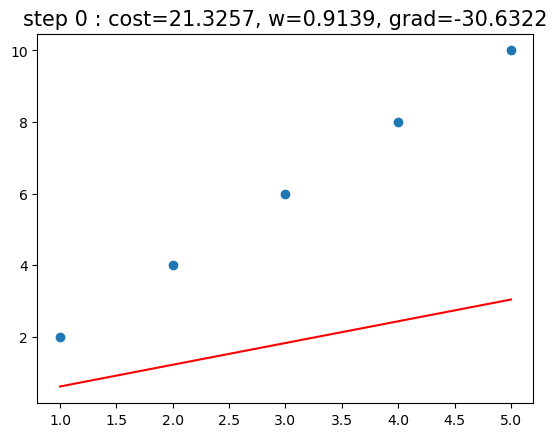

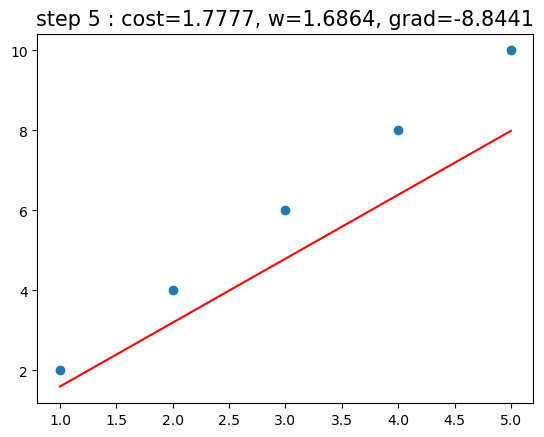

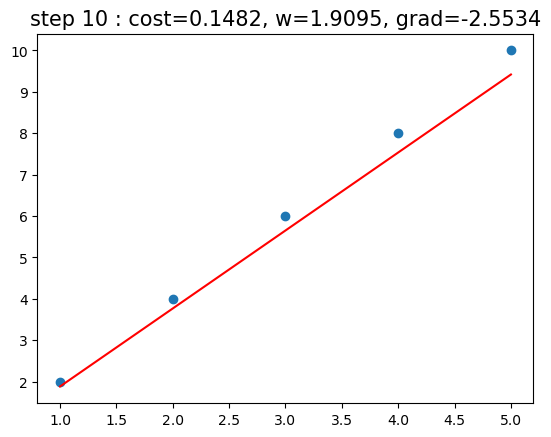

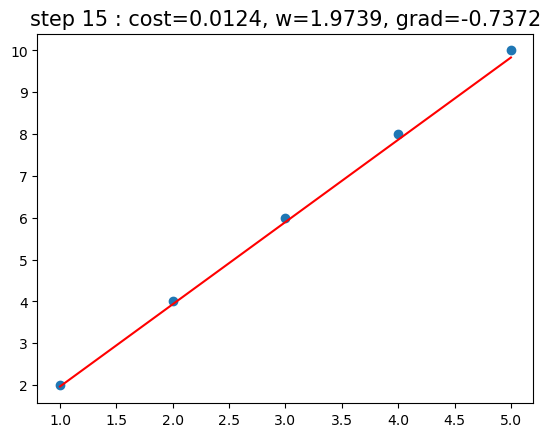

In [7]:
lr = 0.01

for step in range(20):
    pre = w*x
    cost = ((pre - y) ** 2).sum() / len(x)
    #(wx-y)^2 미분 시 2(wx-y)*x
    grad = 2*(pre-y).view(5).dot(x.view(5))/len(x)
    w -= lr*grad
    
    if step % 5 == 0 :
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), pre.numpy(), 'r-')
        # w.size() = 1*1, grad.size() = 1
        plt.title('step %d : cost=%.4f, w=%.4f, grad=%.4f' % (step, cost.item(), w.item(), grad.item()), fontdict={'size':15})
        plt.show()


In [8]:
x_new = torch.Tensor([6])
y_new = w*x_new
y_new.item()

11.941950798034668

### Activation function

신경망의 구성
- 입력층
- 은닉층
- 출력층

선형 신경망을 쌓을 경우 여러개를 쌓아도 선형 함수가 나오기 때문에 의미가 없음. 
따라서, "활성화 함수"를 추가시켜줌.
- 많이 사용되는 활성화 함수: ReLU, sigmoid, softmax(classification)

## Define Model with nn.Linear, Optimizer

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
x_data = torch.Tensor([1, 2, 3, 4, 5])
y_data = torch.Tensor([2, 4, 6, 8, 10])

x = x_data.view(5, 1)
y = y_data.view(5, 1)

In [12]:
model = nn.Linear(1, 1, bias = False)
model.weight

Parameter containing:
tensor([[0.8983]], requires_grad=True)

In [13]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

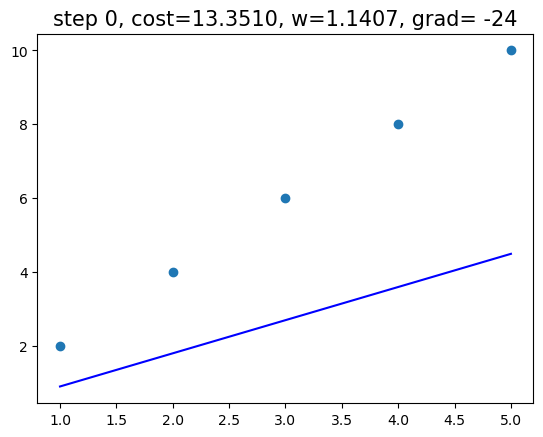

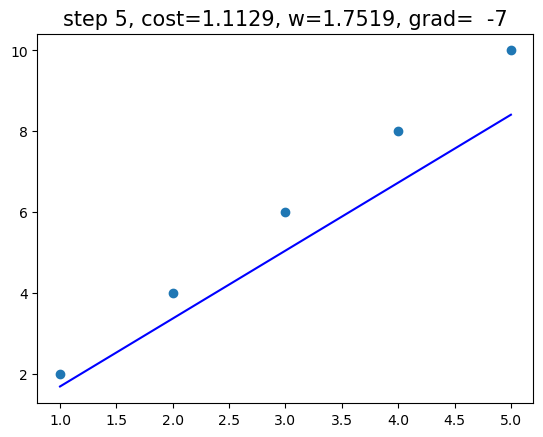

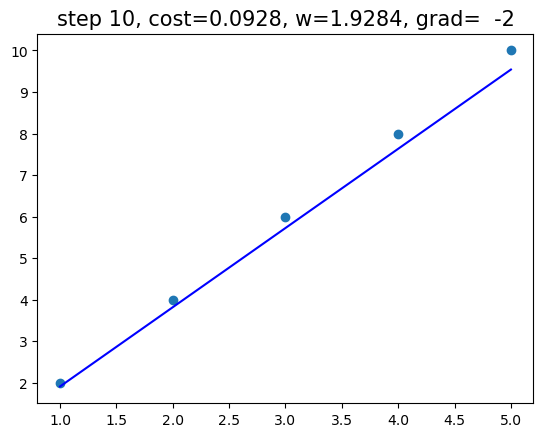

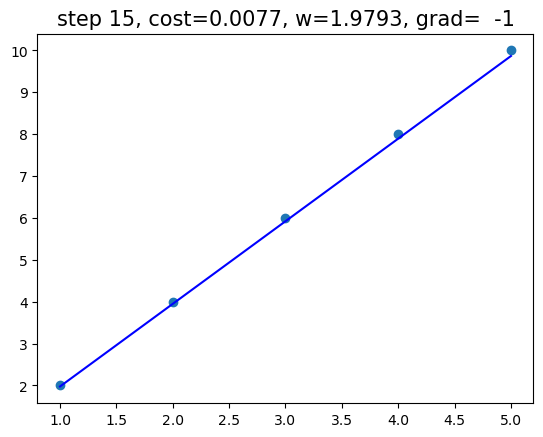

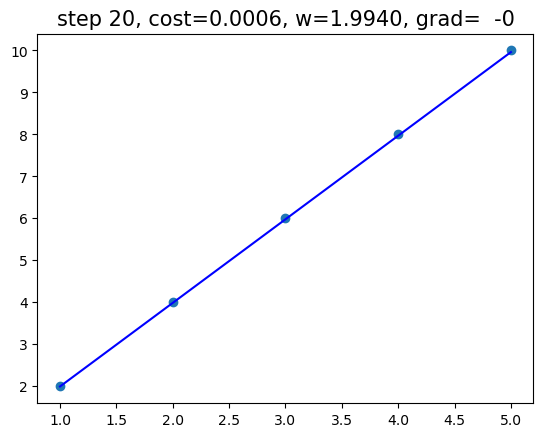

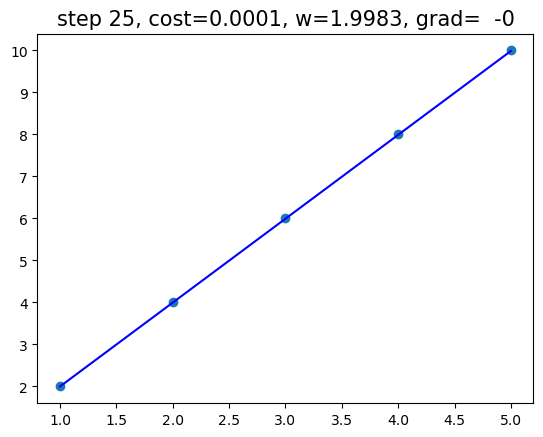

In [14]:
for step in range(30):
    pre = model(x)#순전파
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 5 == 0:
        plt.scatter(x.numpy(), y.numpy())
        # grad를 가진 tensor는 numpy()를 바로 사용할 수 없음
        # RuntimeError: Can't call numpy() on Variable that requires grad.
        plt.plot(x.numpy(), pre.data.numpy(), 'b-')
        plt.title('step %d, cost=%.4f, w=%.4f, grad=%4.f' 
                  % (step, cost.item() ,model.weight.item(), model.weight.grad.item()), fontdict={'size':15})
        plt.show()

## Activation function

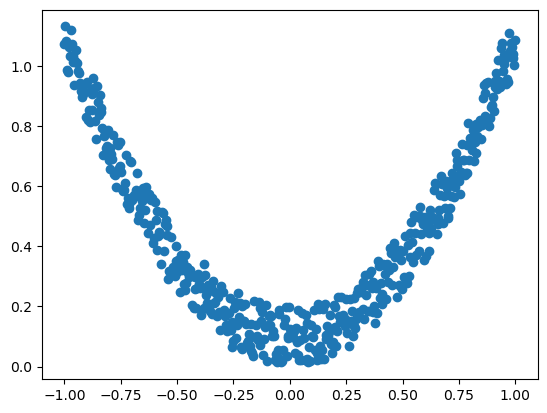

In [15]:
x = torch.linspace(-1, 1, 500)
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [16]:
x = torch.unsqueeze(x, dim = 1)
y = torch.unsqueeze(y, dim = 1)

In [17]:
hidden = nn.Linear(1, 20, bias=True)
output = nn.Linear(20, 1, bias=True)

In [18]:
model = nn.Sequential(hidden, output)

In [19]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

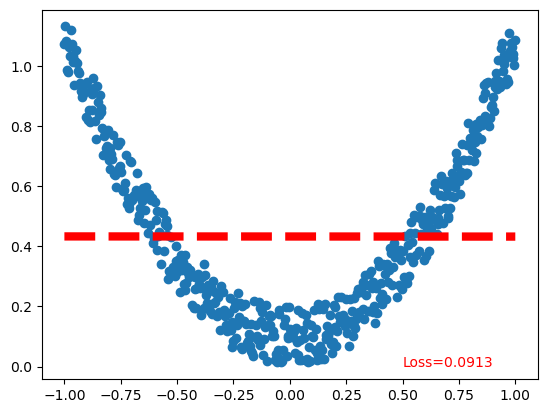

In [20]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=6)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()

## Define & Train NonLinear Model

In [21]:
hidden = nn.Linear(1, 20, bias=True)
activation = nn.ReLU()
output = nn.Linear(20, 1, bias=True)

In [22]:
model = nn.Sequential(hidden, activation, output)

In [23]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

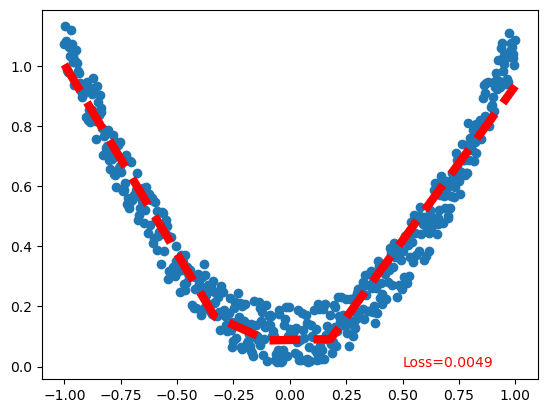

In [24]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=6)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()